# **AP157 Module C Lab Assignment**

## Module C1: Networks

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.

_Credits_: The sample social network used is taken from https://nauczanki.wordpress.com/2014/11/10/social-network-analysis-basics-in-300-words-dalmooc-assignment-week-3/, which in turn is taken from an unspecified MOOC assignment.

### Student Information

_Full Name (Last Name, First Name)_: \
_Student No._:\
_Section_:

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/30
* Part 4 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For all parts of this assignment,  refer to the diagram of the sample social network in the Google Drive "Datasets" Folder (https://drive.google.com/file/d/1DkAK44GfocX0bmlSfK5Q6cbYXAUkixyj/view?usp=drive_link)

#### PART 1 - Network generation and characteristics *(30 points)*

1. Using the Python package networkx, define a network that represents the social network of friends in the diagram. *(15 points)*  

2. Calculate the ff. network characteristics: *(15 points; 5 points each)*
- Diameter
- Density
- Average Degree

3. Create the degree distribution plot and briefly discuss what it tells us about this social network. *(10 points)*

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

C:\Users\PKHR\AppData\Local\Temp\ipykernel_7840\63033260.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


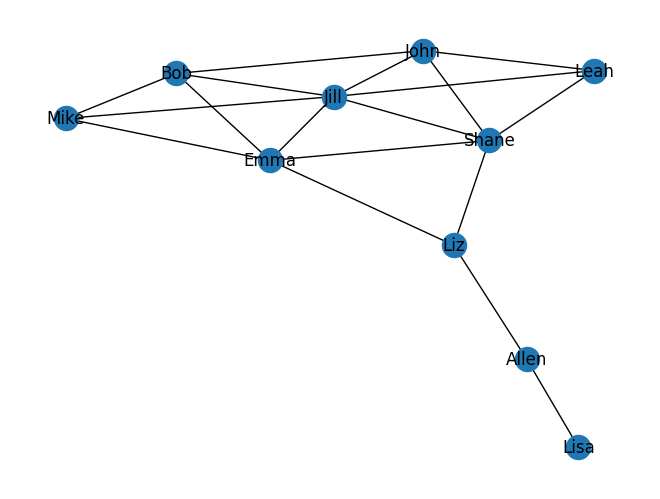

In [18]:
G = nx.Graph()
nodes = ['Lisa',  
     'Allen', 
     'Liz',
     'Emma', 
     'Jill', 
     'Shane',
     'Leah',
     'John',
     'Bob',
     'Mike']
nameshrt = ['Ls','Al','Lz','Em','Ji','Sh','Le','Jo','Bo','Mi']
G.add_nodes_from(nodes)
edges = [('Lisa','Allen'),
         ('Allen','Liz'),
         ('Liz','Emma'),
         ('Liz','Shane'),
         ('Shane','Emma'),
         ('Shane','Jill'),
         ('Shane','Leah'),
         ('Shane','John'),
         ('Leah','John'),
         ('Shane','Jill'),
         ('Jill','Bob'),
         ('Jill','Emma'),
         ('Jill','Mike'),
         ('Jill','John'),
         ('Jill','Leah'),
         ('Bob','Emma'),
         ('Bob','John'),
         ('Bob','Mike'),
         ('Mike','Emma'),
         ('Mike','Emma'),]
G.add_edges_from(edges)
nx.draw(G, with_labels = True)

In [4]:
diameter = nx.diameter(G)
density = nx.density(G)
deglist = dict(G.degree())
degval = np.array(list(deglist.values()))
degkey = list(deglist.keys())
degree = np.mean(degval)
frequency = np.zeros_like(degval)
print('The Diameter is', diameter)
print('The Density is', density)
print('The Average degree is', degree)

for i in range(len(degval)):
    for j in range(len(degval)):
        if degval[i] == (j+1):
            frequency[j] += 1

The Diameter is 4
The Density is 0.4
The Average degree is 3.6


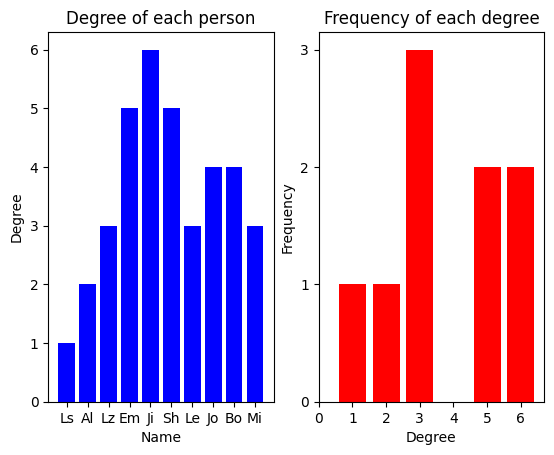

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.bar(nameshrt, degval, color = 'blue')
ax1.set_title('Degree of each person')
ax1.set_xlabel('Name')
ax1.set_ylabel('Degree')

ax2.bar(degval, frequency, color = 'red')
ax2.set_title('Frequency of each degree')
ax2.set_xlabel('Degree')
ax2.set_ylabel('Frequency')
ax2.set_yticks(np.arange(0,4, step = 1))
ax2.set_xticks(np.arange(0,7, step = 1))
plt.show()

#### PART 2 - Centrality Measures *(30 points)*

Generate a table of centrality measures per node. Columns are:
- Name
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

Briefly discuss who are the most "central" people in the social network and why.

In [6]:
names = nodes
degraw = nx.degree_centrality(G)
betraw = nx.betweenness_centrality(G)
cloraw = nx.closeness_centrality(G)
degcen = np.array(degraw.values())
betcen = np.array(betraw.values())
clocen = np.array(cloraw.values())

df = pd.DataFrame()
df.insert(0, 'Names', names)
df.insert(1, 'Degree Centrality', degcen)
df.insert(2, 'Betweenness Centrality', betcen)
df.insert(3, 'Closeness Centrality', clocen)
df

,Names,Degree Centrality,Betweenness Centrality,Closeness Centrality
0,Lisa,0.111111,0.0,0.310345
1,Allen,0.222222,0.222222,0.428571
2,Liz,0.333333,0.388889,0.6
3,Emma,0.555556,0.231481,0.642857
4,Jill,0.666667,0.101852,0.6
5,Shane,0.555556,0.231481,0.642857
6,Leah,0.333333,0.0,0.5
7,John,0.444444,0.023148,0.529412
8,Bob,0.444444,0.023148,0.529412
9,Mike,0.333333,0.0,0.5


#### PART 3 - Identify communities *(40 points)*

1. Identify communities in the social network using *(30 points)*:
- Louvain community detection algorithm
- Any other community detection algorithm of your choice

2. Calculate the modularity of the partitions from the two community detection algorithms. *(10 points)*

Briefly describe the algorithm you used and compare the results from the two algorithms.

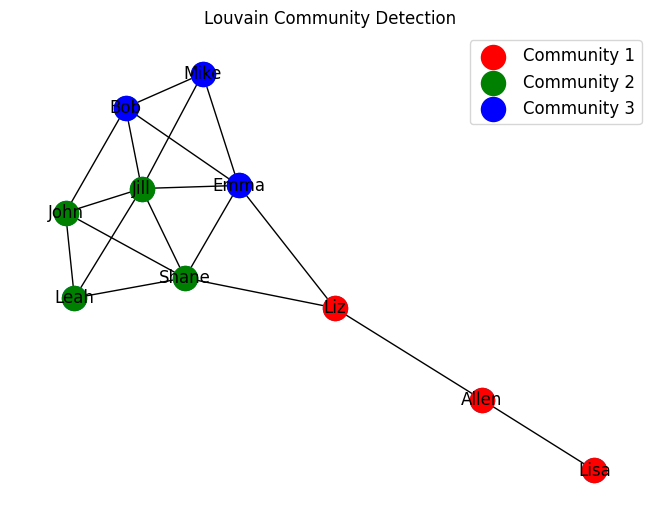

In [57]:
Ca, Cb, Cc = nx.community.louvain_communities(G)
Ca = list(Ca)
Cb = list(Cb)
Cc = list(Cc)
nodes1 = Ca + Cb + Cc
Gc1 = nx.Graph()
for i in nodes1:
    Gc1.add_node(i)
for from_loc, to_loc in edges:
    Gc1.add_edge(from_loc, to_loc)
pos = nx.spring_layout(Gc1)
nx.draw(Gc1, pos, with_labels = True)
nx.draw_networkx_nodes(Gc1, pos, nodelist=Ca, node_color='r', label = 'Community 1')
nx.draw_networkx_nodes(Gc1, pos, nodelist=Cb, node_color='g', label = 'Community 2')
nx.draw_networkx_nodes(Gc1, pos, nodelist=Cc, node_color='b', label = 'Community 3')
plt.title('Louvain Community Detection')
plt.legend(fontsize = '12')
plt.show()

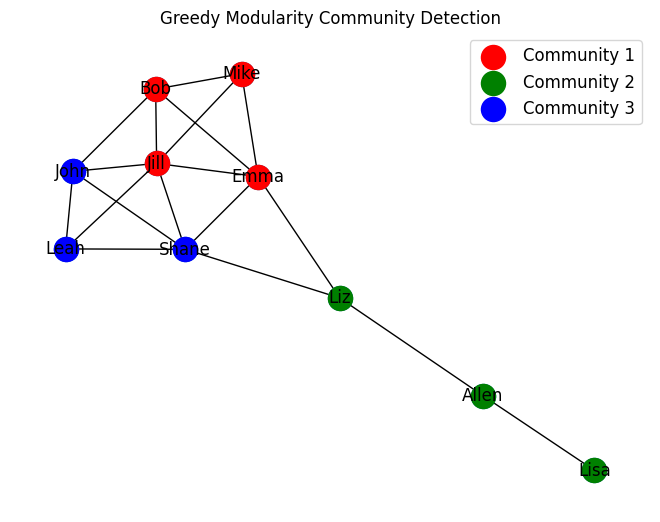

In [54]:
Ca1, Cb1, Cc1 = nx.community.greedy_modularity_communities(G)
Ca1 = list(Ca1)
Cb1 = list(Cb1)
Cc1 = list(Cc1)
nodes2 = Ca1 + Cb1 + Cc1
Gc2 = nx.Graph()
for i in nodes2:
    Gc2.add_node(i)
for from_loc, to_loc in edges:
    Gc2.add_edge(from_loc, to_loc)
pos1 = nx.spring_layout(Gc2)
nx.draw(Gc2, pos1, with_labels = True)
nx.draw_networkx_nodes(Gc2, pos1, nodelist=Ca1, node_color='r', label = 'Community 1')
nx.draw_networkx_nodes(Gc2, pos1, nodelist=Cb1, node_color='g', label = 'Community 2')
nx.draw_networkx_nodes(Gc2, pos1, nodelist=Cc1, node_color='b', label = 'Community 3')
plt.title('Greedy Modularity Community Detection')
plt.legend(fontsize = '12')
plt.show()